In [1]:
using Gadfly

In [2]:
using Compose


In [3]:
import Compose

In [4]:
# svg = SVG(4inch, 4(sqrt(3)/2)inch)

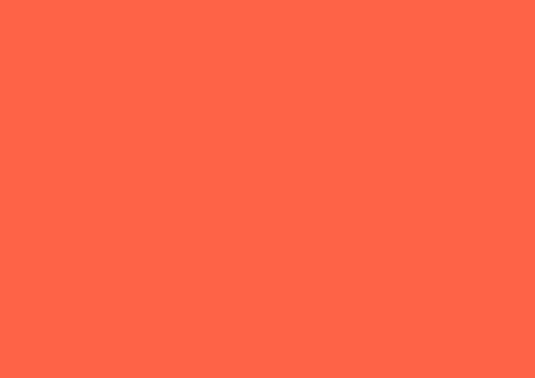

In [5]:
compose(context(), rectangle(), fill("tomato"));
# draw(svg, compose(context(), rectangle(), fill("tomato")))

In [26]:
set_default_graphic_size(10cm, 10cm)

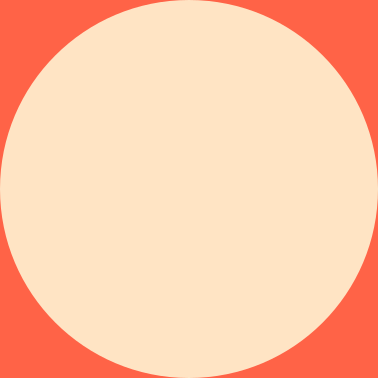

In [27]:
compose(context(),
        (context(), circle(), fill("bisque")),
        (context(), rectangle(), fill("tomato")))

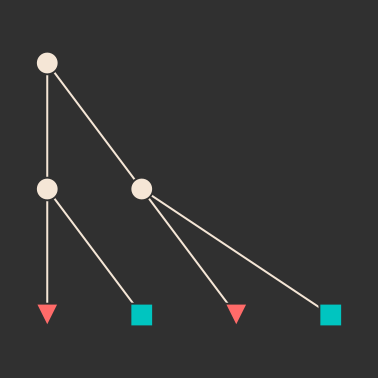

In [28]:
tomato_bisque =
    compose(context(),
            (context(), circle(), fill("bisque")),
            (context(), rectangle(), fill("tomato")))

introspect(tomato_bisque)


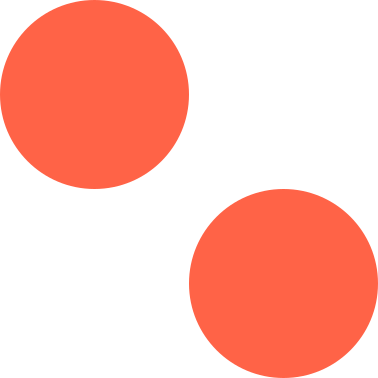

In [38]:
compose(context(), fill("tomato"),
        (context(0.0, 0.0, 0.5, 0.5), circle()),
        (context(0.5, 0.5, 0.5, 0.5), circle()))


In [32]:
help(Compose.fill)

Base.fill(x, dims)

   Create an array filled with the value "x". For example,
   "fill(1.0, (10,10))" returns a  10x10 array of floats, with each
   element initialized to 1.0.

   If "x" is an object reference, all elements will refer to the
   same object. "fill(Foo(), dims)" will return an array filled with
   the result of evaluating "Foo()" once.


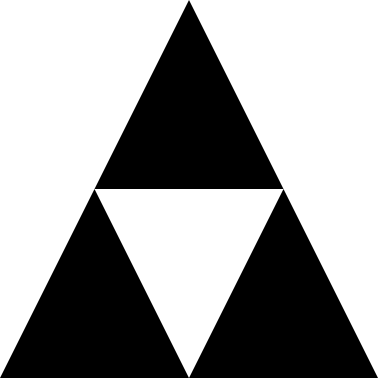

In [52]:
function sierpinski(n)
    if n == 0
        compose(context(), polygon([(1,1), (0,1), (1/2, 0)]))
    else
        t = sierpinski(n - 1)
        compose(context(),
                (context(1/4,   0, 1/2, 1/2), t),
                (context(  0, 1/2, 1/2, 1/2), t),
                (context(1/2, 1/2, 1/2, 1/2), t))
    end
end

s3 = compose(sierpinski(1), fill("black"))
# introspect(s3)


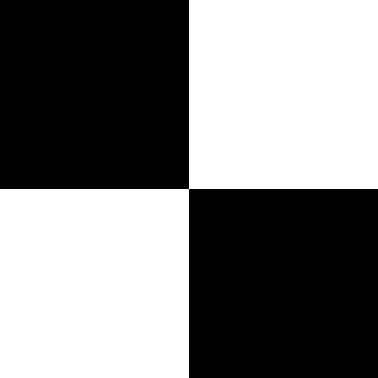

In [76]:
function sierpinski_square(n)
    if n == 0
        compose(context(), rectangle() )
    else
        t = sierpinski_square(n - 1)
        compose(context(),
                (context(0, 0, 1/2, 1/2), t),
#                 (context(1/2, 0, 1/4, 1/4), t),
#                 (context(3/4, 1/4, 1/4, 1/4), t),
                (context(1/2, 1/2, 1/2, 1/2), t),
        )
    end
end

s3 = compose(sierpinski_square(1), fill("black"))
# introspect(s3)


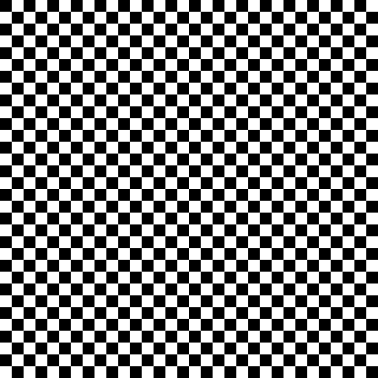

In [103]:
function squares(n::Int)
    if n == 0
        compose(context(), rectangle(0, 0, 1/2, 1/2), rectangle(1/2, 1/2, 1/2, 1/2))
    else
        t = squares(n - 1)
        compose(context(),
                (context(0, 0, 1/2, 1/2), t),
                (context(1/2,   0, 1/2, 1/2), t),
                (context(  0, 1/2, 1/2, 1/2), t),
                (context(1/2, 1/2, 1/2, 1/2), t),
#                 (context(1/2, 1/2, 1/2, 1/2), t),
        )
    end
end

s3 = compose(squares(4), fill("black"))
# introspect(s3)


In [104]:
sc(n) = compose(squares(n), fill("black"))


sc (generic function with 1 method)

In [105]:
img = SVG("squares-4.svg", 4inch, 4inch)
img = PDF("squares-4.pdf", 4inch, 4inch)
draw(img, sc(4))


In [130]:

for i in 1:4
    println("Saving: $i")
    for dim in [ 4, 6, 8]
        println("Dim: $(dim) inch")
        imgSvg = SVG("squares/image (name=grid ; (layers=$i ; dim=$dim).svg", dim*1inch, dim*1inch)
        imgPdf = PDF("squares/image (name=grid ; layers=$i ; dim=$dim).pdf", dim*1inch, dim*1inch)
        draw(imgSvg, sc(4))
        draw(imgPdf, sc(4))
    end
end

Saving: 1
Dim: 4 inch
Dim: 6 inch
Dim: 8 inch
Saving: 2
Dim: 4 inch
Dim: 6 inch
Dim: 8 inch
Saving: 3
Dim: 4 inch
Dim: 6 inch
Dim: 8 inch
Saving: 4
Dim: 4 inch
Dim: 6 inch
Dim: 8 inch


In [119]:
dim = 4inch

Measure{MeasureNil,MeasureNil}(101.6,MeasureNil(),MeasureNil(),0.0,0.0)

In [128]:
pwd()

"/Users/jaremycreechley/proj/phd-research/Test"